In [4]:
import numpy as np
import pandas as pd
import random
import csv
import requests
headers = { 
    'accept': "application/json", 
    'apikey': "500bcdd275338226e8f70edc46214483" } 
cities_df = pd.read_csv("./ViolentCrime2017.csv")
cities_df.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants"
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79
1,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56
2,Wisconsin,Kenosha,"100,038",141,"1,042",0,140.95,0.01,1041.6
3,Florida,Davie,100612,97,1431,0,96.41,0.01,1422.3
4,New Jersey,Woodbridge Township,100950,51,802,0,50.52,0.01,794.45


In [5]:
base_url ="https://search.onboard-apis.com/areaapi/v2.0.0/state/lookup"
res = requests.get(base_url,headers=headers).json()
res
st_data =pd.DataFrame(res['response']['result']['package']['item'])
st_data.rename(columns={'name':'State','geo_key':'St_geo_key'}, inplace=True)
statedata = st_data[['State','St_geo_key','abbreviation']]
city_table =pd.merge(cities_df, statedata, on="State", how="left")
city_table.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",St_geo_key,abbreviation
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA
1,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56,ST53,WA
2,Wisconsin,Kenosha,"100,038",141,"1,042",0,140.95,0.01,1041.6,ST55,WI
3,Florida,Davie,100612,97,1431,0,96.41,0.01,1422.3,ST12,FL
4,New Jersey,Woodbridge Township,100950,51,802,0,50.52,0.01,794.45,ST34,NJ


In [8]:
appended_new = pd.DataFrame([])
for index, row in city_table.iterrows():
    stgc = row['St_geo_key']
    city = row['City']  
    city_url ="https://search.onboard-apis.com/areaapi/v2.0.0/geoid/lookup/?geoId="+stgc+"&GeoType=PL" 
    
    resc = requests.get(city_url,headers=headers).json()
    city_data = pd.DataFrame(resc['response']['result']['package']['item'])
    
    new = city_data.loc[city_data['name'] == city]      
    appended_new = appended_new.append(new)
    
appended_new.head()

,area,area_unit,geo_key,id,name,type
1747,19.3683,sq. mi.,PL4224000,4224000,Erie,PL
601,23.6186,sq. mi.,PL5357745,5357745,Renton,PL
752,27.8249,sq. mi.,PL5539225,5539225,Kenosha,PL
867,35.6799,sq. mi.,PL1216475,1216475,Davie,PL
671,41.9473,sq. mi.,PL1871000,1871000,South Bend,PL


In [12]:
city_table1 =pd.merge(city_table, appended_new, left_on=['City'], right_on=['name'])
city_table1.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants",St_geo_key,abbreviation,area,area_unit,geo_key,id,name,type
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79,ST42,PA,19.3683,sq. mi.,PL4224000,4224000,Erie,PL
1,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56,ST53,WA,23.6186,sq. mi.,PL5357745,5357745,Renton,PL
2,Wisconsin,Kenosha,"100,038",141,"1,042",0,140.95,0.01,1041.6,ST55,WI,27.8249,sq. mi.,PL5539225,5539225,Kenosha,PL
3,Florida,Davie,100612,97,1431,0,96.41,0.01,1422.3,ST12,FL,35.6799,sq. mi.,PL1216475,1216475,Davie,PL
4,Indiana,South Bend,101240,465,2201,0,459.3,0.02,2174.04,ST18,IN,41.9473,sq. mi.,PL1871000,1871000,South Bend,PL


In [13]:
appended_main = pd.DataFrame([])

for index, row in city_table1.iterrows():
    cgc = row['geo_key']
  
    base_url="https://search.onboard-apis.com/communityapi/v2.0.0/area/full?AreaId="+cgc
    
    resct = requests.get( base_url,headers=headers).json()
    city_data2 = pd.DataFrame(resct['response']['result']['package']['item'])
    appended_main = appended_main.append(city_data2)
 
    #appended_new = appended_new.append(new)
    
# cocrmcyasst : Assault Risk (County)
# cocrmcytotc : Total Crime Risk (County)
crime = appended_main[['name','latitude','geo_key','longitude','cocrmcyasst','cocrmcytotc']]
crime.head()

,name,latitude,geo_key,longitude,cocrmcyasst,cocrmcytotc
0,Erie,42.115943,PL4224000,-80.073991,79,83
0,Renton,47.478434,PL5357745,-122.183594,59,127
0,Kenosha,42.584065,PL5539225,-87.852219,39,70
0,Davie,26.080792,PL1216475,-80.280488,103,112
0,South Bend,41.670857,PL1871000,-86.253333,41,119


In [44]:
crime1 = crime.reset_index()
crime1 = crime1.drop(columns=['index'])
crime1 = crime1.iloc[0:1,:]

In [46]:
schools = pd.DataFrame(columns=['city_name','latitude','longitude','geo_key','cocrmcyasst','cocrmcytotc','school_id'])
schoolCount = 0
for index, row in crime1.iterrows():
    lat = row['latitude']
    lng = row['longitude']  
    sch_url="https://search.onboard-apis.com/propertyapi/v1.0.0/school/snapshot?latitude="+lat+"&longitude="+lng+"&radius=50&filetypetext=public"
    resch = requests.get(sch_url,headers=headers).json()
    for a_school in resch['school']:
        schools.loc[schoolCount] = [row['name'],row['latitude'], row['longitude'],row['geo_key'],row['cocrmcyasst'],row['cocrmcytotc'],a_school['Identifier']['OBInstID'] ]
        schoolCount += 1

schools

,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id
0,Erie,42.115943,-80.073991,PL4224000,79,83,04791835
1,Erie,42.115943,-80.073991,PL4224000,79,83,05286986
2,Erie,42.115943,-80.073991,PL4224000,79,83,02107991
3,Erie,42.115943,-80.073991,PL4224000,79,83,00909157
4,Erie,42.115943,-80.073991,PL4224000,79,83,00909016
5,Erie,42.115943,-80.073991,PL4224000,79,83,00909054
6,Erie,42.115943,-80.073991,PL4224000,79,83,00909121
7,Erie,42.115943,-80.073991,PL4224000,79,83,5700052313
8,Erie,42.115943,-80.073991,PL4224000,79,83,00909030
9,Erie,42.115943,-80.073991,PL4224000,79,83,00909092


In [47]:
for index, row in schools.iterrows():
    city_name = row['city_name']
    school_id = row['school_id']         
    sch_url="https://search.onboard-apis.com/propertyapi/v1.0.0/school/detail?id="+school_id
    try:
        response = requests.get(sch_url,headers=headers)
        if response.status_code == requests.codes.ok:
            resch = requests.get(sch_url,headers=headers).json()
            #Studentteacher is School enrollment student teacher
            row['studentteacherratio'] = resch['school'][0]['SchoolProfileAndDistrictInfo']['SchoolEnrollment']['Studentteacher']
            row['highschool'] = resch['school'][0]['SchoolProfileAndDistrictInfo']['SchoolSummary']['High']
            print(resch['school'][0]['SchoolProfileAndDistrictInfo']['SchoolEnrollment']['Studentteacher'])
        else:
            print("School not found. Skipping...")
    except:         
        print("Unknown exception...")
        pass
schools.head()

17
12
11
11
Unknown exception...
11
13
10
13
14


,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id
0,Erie,42.115943,-80.073991,PL4224000,79,83,04791835
1,Erie,42.115943,-80.073991,PL4224000,79,83,05286986
2,Erie,42.115943,-80.073991,PL4224000,79,83,02107991
3,Erie,42.115943,-80.073991,PL4224000,79,83,00909157
4,Erie,42.115943,-80.073991,PL4224000,79,83,00909016


In [116]:
#remove data when student teacher ratio is not reported
schools_data = schools
# schools_data2 = schools_data.loc[schools_data['studentteacherratio'] != 'Not Reported', :] 
schools_data2 = schools_data.loc[(schools_data['studentteacherratio'] != 'Not Reported') & (schools_data['highschool'] == 'Y'), :] 
schools_data2.head()

,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id,studentteacherratio
0,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089528,15
1,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089530,17
2,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089308,14
3,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089097,18
5,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01882136,19


In [132]:
#convert student teacher ratio column data to integer
schools_data2['studentteacherratio'] = schools_data2['studentteacherratio'].astype(str).astype(int)
schools_data2['cocrmcyasst'] = schools_data2['cocrmcyasst'].astype(str).astype(int)
schools_data2['cocrmcytotc'] = schools_data2['cocrmcytotc'].astype(str).astype(int)

schools_data2.head()

C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,city_name,latitude,longitude,geo_key,cocrmcyasst,cocrmcytotc,school_id,studentteacherratio
0,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089528,15
1,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089530,17
2,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089308,14
3,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01089097,18
5,Virginia Beach,36.820655,-76.099708,PL5182000,27,71,01882136,19


In [133]:
# calculate average student teacher ratio for each city
schools_city = schools_data2.groupby(['city_name'])['cocrmcyasst','cocrmcytotc','studentteacherratio'].mean()
schools_city.head()

,cocrmcyasst,cocrmcytotc,studentteacherratio
city_name,,,
Anaheim,49.0,55.0,22.375000
Baltimore,311.0,272.0,15.500000
Detroit,224.0,188.0,14.111111
Memphis,256.0,238.0,16.250000
St. Louis,571.0,475.0,14.111111


Text(0.5, 1.0, 'Student/Teacher Ratio vs. Total Crime Risk (County)')

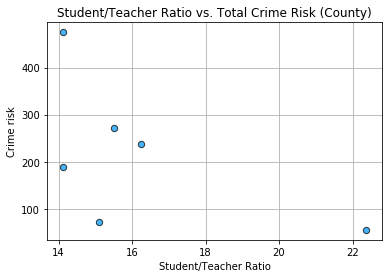

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt

# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)
#cocrmcytotc
plt.scatter(schools_city['studentteacherratio'], schools_city['cocrmcytotc'], marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)

plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Crime risk')
plt.title(f"Student/Teacher Ratio vs. Total Crime Risk (County)")

In [ ]:
# scatter plot for Student/Teacher Ratio vs. Assault Risk (County)
#cocrmcyasst